# Density Estimation for a mixture of Gaussians

Adapted from http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html

Plot the density estimation of a mixture of two Gaussians. Data is generated from two Gaussians with different centers and covariance matrices.

In [1]:
using PyPlot, PyCall, Statistics, Random
using ScikitLearn
using ScikitLearn.Utils: meshgrid

@pyimport matplotlib.colors as mpl_colors

@sk_import mixture: GaussianMixture

┌ Info: Recompiling stale cache file /Users/cedric/.julia/compiled/v0.7/ScikitLearn/tbUuI.ji for ScikitLearn [3646fa90-6ef7-5e7e-9f22-8aca16db6324]
└ @ Base loading.jl:1185
┌ Warning: `using A.B` will only be allowed for modules, not single bindings. Use `using A: B` instead
│   caller = ip:0x0
└ @ Core :-1


PyObject <class 'sklearn.mixture.gaussian_mixture.GaussianMixture'>

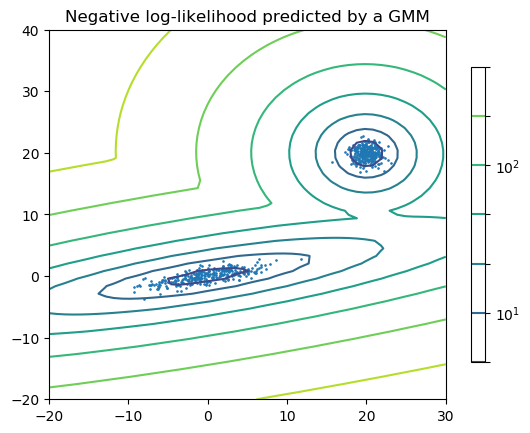

In [5]:
n_samples = 300

# generate random sample, two components
Random.seed!(42)

# generate spherical data centered on (20, 20)
shifted_gaussian = randn(n_samples, 2) .+ [20, 20]'

# generate zero centered stretched Gaussian data
C = [0. -0.7
     3.5 .7]
stretched_gaussian = randn(n_samples, 2) * C

# concatenate the two datasets into the final training set
X_train = vcat(shifted_gaussian, stretched_gaussian)

# fit a Gaussian Mixture Model with two components
clf = GaussianMixture(n_components=2, covariance_type="full")
fit!(clf, X_train)

# display predicted scores by the model as a contour plot
x = range(-20.0, stop=30.0, length=50)
y = range(-20.0, stop=40.0, length=50)
X, Y = meshgrid(x, y)
XX = hcat(X[:], Y[:])
Z = -score_samples(clf, XX)
Z = reshape(Z, size(X))

CS = contour(X, Y, Z, norm=mpl_colors.LogNorm(vmin=1.0, vmax=1000.0),
             levels=10 .^ range(0, stop=3, length=10))
CB = colorbar(CS, shrink=0.8, extend="both")
scatter(X_train[:, 1], X_train[:, 2], .8)

title("Negative log-likelihood predicted by a GMM")
axis("tight");